#Preparation des données pour GSCNN - final

Branchement au Drive

In [ ]:
#charger l'emplacement des données
from google.colab import drive
drive.mount('/content/gdrive/')

Mounted at /content/gdrive/


## Préparation des données synthétiques

Préparation de la base de données #1

In [ ]:
%cd /content/gdrive/My Drive/preprocessing/a_utils

# préparation de la  base de données
print('soft-augmented data')
!python c_data_augmentation.py --root_path gdrive/My\ Drive --simpl_litho 1  --canny non --da non --data_path z_data/originals/2_lithor


/content/gdrive/My Drive/preprocessing/a_utils
soft-augmented data
create the dataset
ouvrir image en 3d
ouvrir lithos en 3d
tcmalloc: large alloc 1211547648 bytes == 0x555bc601e000 @  0x7ff15e8301e7 0x7ff15c2f046e 0x7ff15c340c7b 0x7ff15c343e83 0x7ff15c34407b 0x7ff15c3e5761 0x555b6d32ccc0 0x555b6d32ca50 0x555b6d3a0be0 0x555b6d32e30a 0x555b6d39c3b5 0x555b6d32e30a 0x555b6d39c3b5 0x555b6d39b4ae 0x555b6d39b1b3 0x555b6d465182 0x555b6d4654fd 0x555b6d4653a6 0x555b6d43c723 0x555b6d43c3cc 0x7ff15d61abf7 0x555b6d43c2aa
multiplicate_db
tcmalloc: large alloc 2423095296 bytes == 0x555c54f36000 @  0x7ff15e8301e7 0x7ff15c2f046e 0x7ff15c340c7b 0x7ff15c343e83 0x7ff15c34407b 0x7ff15c3e5761 0x555b6d32ccc0 0x555b6d32ca50 0x555b6d3a0be0 0x555b6d32e30a 0x555b6d39c3b5 0x555b6d39b4ae 0x555b6d32e3ea 0x555b6d39d32a 0x555b6d39b4ae 0x555b6d39b1b3 0x555b6d465182 0x555b6d4654fd 0x555b6d4653a6 0x555b6d43c723 0x555b6d43c3cc 0x7ff15d61abf7 0x555b6d43c2aa
fusion des bases de données
splitting and augmenting the datas
l

Préparation de la abase de données #2

In [ ]:
%cd /content/gdrive/My Drive/preprocessing/a_utils

print('high-augmented data')
#on rajoute les données augmentées pour faire un plus gros dataset d'entrainement
!python c_data_augmentation.py --root_path gdrive/My\ Drive --simpl_litho 1  --canny non --da non --data_path z_data/originals/1_dafull --extension '_da' --train 1 -- test 0 --val 0

/content/gdrive/My Drive/preprocessing/a_utils
high-augmented data
create the dataset
ouvrir image en 3d
ouvrir lithos en 3d
multiplicate_db
tcmalloc: large alloc 1893048320 bytes == 0x56052f014000 @  0x7f882d1251e7 0x7f882abe546e 0x7f882ac35c7b 0x7f882ac38e83 0x7f882ac3907b 0x7f882acda761 0x5604794becc0 0x5604794bea50 0x560479532be0 0x5604794c030a 0x56047952e3b5 0x56047952d4ae 0x5604794c03ea 0x56047952f32a 0x56047952d4ae 0x56047952d1b3 0x5604795f7182 0x5604795f74fd 0x5604795f73a6 0x5604795ce723 0x5604795ce3cc 0x7f882bf0fbf7 0x5604795ce2aa
fusion des bases de données
splitting and augmenting the datas
loading data
doing the train dataset
doing the test dataset
doing the val dataset


Séparation des données en entrainement, validation et test

In [ ]:
#Changement de répertoire
%cd /content/gdrive/My Drive/preprocessing/a_utils

from c_data_augmentation import separate_dataset

print('original image')
separate_dataset('../z_data', '../../synt_mag', ['train', 'test', 'val'])

print('add highly augmented images for training')
separate_dataset('../z_data', '../../synt_mag', ['train'], ext = '_da')

/content/gdrive/My Drive/preprocessing/a_utils
original image
train
10 images created
20 images created
30 images created
40 images created
50 images created
60 images created
70 images created
80 images created
90 images created
100 images created
110 images created
120 images created
130 images created
test
140 images created
150 images created
val
160 images created
170 images created
180 images created
190 images created
200 images created
210 images created
220 images created
230 images created
240 images created
250 images created
260 images created
270 images created
280 images created
290 images created
300 images created
310 images created
320 images created
330 images created
340 images created
350 images created
360 images created
370 images created
380 images created
390 images created
400 images created
410 images created
420 images created
430 images created
440 images created
450 images created
460 images created
470 images created
480 images created
490 images created
5

## Preparation des données réeles pour la validation

/content/gdrive/My Drive/preprocessing/a_utils


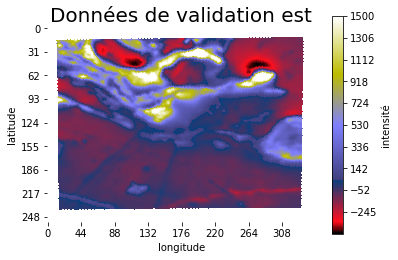

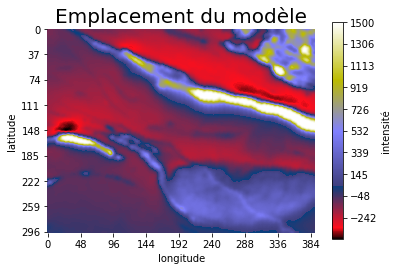

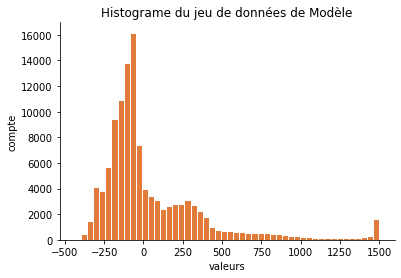

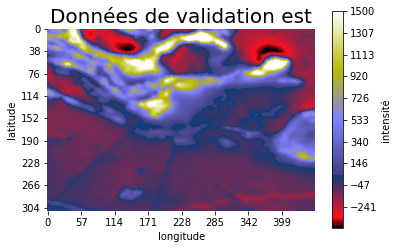

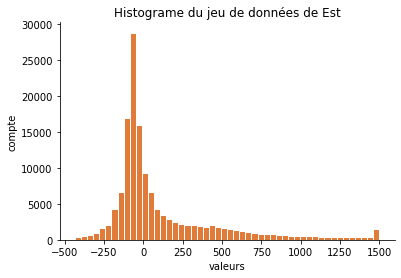

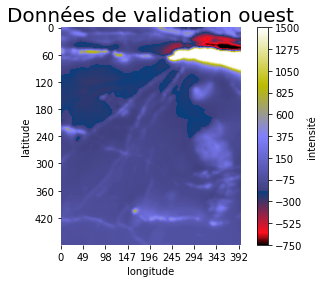

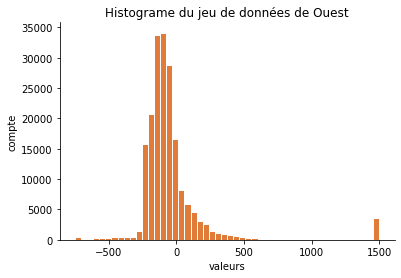

In [ ]:
#définition de l'espace de travail
%cd /content/gdrive/My Drive/preprocessing/a_utils

pp = '../z_data'
#transformation des données .tiff en .pkl
from z_utils import gdal_array, open_pkl, save_pkl
gdal_array('%s/gscnn/mag_model.tif'%pp)
gdal_array('%s/gscnn/mag_similar_est.tif'%pp)
gdal_array('%s/gscnn/mag_similar_ouest.tif'%pp)

#chargement des données 
mag_model = open_pkl('%s/gscnn/mag_model.pkl'%pp)
mag_similar_est = open_pkl('%s/gscnn/mag_similar_est.pkl'%pp)
mag_similar_ouest = open_pkl('%s/gscnn/mag_similar_ouest.pkl'%pp)

#suppression des éléments nulls
from a_cut_data import sup_null
mag_model = sup_null(mag_model, method = 'min')
mag_similar_est = sup_null(mag_similar_est, method = 'min')
mag_similar_ouest = sup_null(mag_similar_ouest, method = 'min')

#supression des valeurs abhérentes
from a_cut_data import clip_data
cutoff = (-750, 1500)
mag_model = clip_data(mag_model, cutoff = cutoff)
mag_similar_est = clip_data(mag_similar_est, cutoff = cutoff)
mag_similar_ouest = clip_data(mag_similar_ouest, cutoff = cutoff)

#normalization 
from a_cut_data import normalize_image
mag_model = normalize_image(mag_model, method='not', m0m1 = False)
mag_similar_est = normalize_image(mag_similar_est, method='not', m0m1 = False)
mag_similar_ouest = normalize_image(mag_similar_ouest, method='not', m0m1 = False)

from d_graphics import plot_image, plot_histogram
plot_image(mag_similar_est, 'Données de validation est')

#enlever les bordures des images
from c_data_augmentation import cut_tile
import numpy as np
mag_model = cut_tile(np.expand_dims(mag_model, -1))[:,:,0]
mag_similar_est = mag_similar_est[24:,24:][:-24,:-24] #cut_tile(np.expand_dims(mag_similar_est, -1))[:,:,0]
mag_similar_ouest = cut_tile(np.expand_dims(mag_similar_ouest, -1))[:,:,0]

#lisser les images pour enlever le bruit
from z_utils import resize_smooth
rat = 75/50
mag_model = resize_smooth(mag_model, rat)
mag_similar_est = resize_smooth(mag_similar_est, rat)
mag_similar_ouest = resize_smooth(mag_similar_ouest, rat)

#visualisation des résultats
from d_graphics import plot_image, plot_histogram
plot_image(mag_model, 'Emplacement du modèle')
plot_histogram(mag_model, bins = 50, name = 'Modèle')
plot_image(mag_similar_est, 'Données de validation est')
plot_histogram(mag_similar_est, bins = 50, name = 'Est')
plot_image(mag_similar_ouest, 'Données de validation ouest')
plot_histogram(mag_similar_ouest, bins = 50, name = 'Ouest')

#save images
save_pkl('%s/gscnn/mag_model_pp.pkl'%pp, mag_model)
save_pkl('%s/gscnn/mag_similar_est_pp.pkl'%pp, mag_similar_est)
save_pkl('%s/gscnn/mag_similar_ouest_pp.pkl'%pp, mag_similar_ouest)